#### Importing

In [3]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import optimizers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Loading Data

In [4]:
housing=fetch_california_housing()

#### Spliting Data for tesing and validation

In [36]:
X_train_full,X_test,y_train_full,y_test=train_test_split(housing['data'],housing['target'])
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full)

#### Scaling inputs

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

#### Building Neural Network

In [38]:
#2 hidden layers with 30(lower) and 20(upper) nodes 
model=keras.Sequential([
     keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
    keras.layers.Dense(20),
    keras.layers.Dense(1)
])
sgd=optimizers.SGD(learning_rate=0.015)
model.compile(loss='mean_squared_error',optimizers=sgd) 

In [39]:
history=model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=5,batch_size=1)

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 11s 970us/sample - loss: 0.9467 - val_loss: 3.9730
Epoch 2/5
11610/11610 [==============================] - 11s 953us/sample - loss: 0.4819 - val_loss: 0.8407
Epoch 3/5
11610/11610 [==============================] - 11s 941us/sample - loss: 0.4542 - val_loss: 0.7520
Epoch 4/5
11610/11610 [==============================] - 11s 932us/sample - loss: 0.4139 - val_loss: 0.5192
Epoch 5/5
11610/11610 [==============================] - 11s 974us/sample - loss: 0.4402 - val_loss: 0.3581


#### Evaluating with test set

In [41]:
model.evaluate(X_test,y_test,verbose=2)

5160/1 - 0s - loss: 0.2646


0.33626191452030063

#### Learning Curves

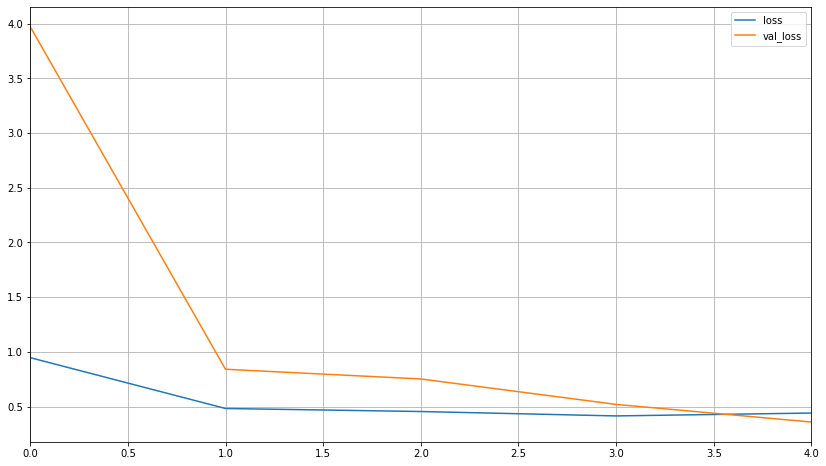

In [40]:
pd.DataFrame(history.history).plot(figsize=(14,8))
plt.grid(True)